<a href="https://colab.research.google.com/github/rfadhila07/Test-result/blob/main/TA_NewScenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect your Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16
from keras.models import Model
import tensorflow as tf
import cv2
import io
from skimage.filters import gaussian
from skimage import exposure
import matplotlib.image as mpimg
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization
from tensorflow.keras.layers import Add, GlobalAveragePooling2D
from skimage import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop, Adamax, Nadam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator

import keras
import numpy as np
import cv2
import os
import random
import shutil
import pandas as pd
import csv
import zipfile
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input, Conv2D, MaxPooling2D
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import RandomNormal
import keras.backend as k
from sklearn.utils import shuffle
import io
from PIL import Image as pil_image
# from keras_retinanet import layers
import keras.backend as k
# import keras_retinanet

In [3]:
fold_num=1 #Select Fold Number

In [4]:
#Here we set the data generators for applying data augmentation methods
train_datagen = ImageDataGenerator()#horizontal_flip=True,vertical_flip=True,zoom_range=0.05,rotation_range=360,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05)
test_datagen = ImageDataGenerator()
train_df =pd.read_csv('/content/drive/MyDrive/COVID-CTset/CSV/train{}.csv'.format(fold_num)) #raed train csv file
validation_df = pd.read_csv('/content/drive/MyDrive/COVID-CTset/CSV/validation{}.csv'.format(fold_num)) #raed validation csv file (Validation in the training process)
train_df = shuffle(train_df) #Shuffle the train data
test_df = pd.read_csv('/content/drive/MyDrive/COVID-CTset/CSV/test{}.csv'.format(fold_num))#raed test csv file (For evaluating the final version of th

In [5]:
# generating one row 
train_df = train_df.sample(n =1900, random_state=1)
    
# display
train_df

,filename,class
525,137covid_patient92_SR_2_IM00007.tif,covid
1785,157covid_patient140_SR_4_IM00021.tif,covid
300,137covid_patient63_SR_2_IM00027.tif,covid
2951,normal1_patient185_SR_2_IM00025.tif,normal
3064,normal1_patient189_SR_2_IM00010.tif,normal
...,...,...
3473,normal4_patient186_SR_2_IM00043.tif,normal
2243,cdunnormal_patient160_SR_2_IM00036.tif,normal
869,137covid_patient45_SR_3_IM00007.tif,covid
1824,cdnormal4_patient146_SR_2_IM00010.tif,normal


In [6]:
train_df.groupby('class').count()

,filename
class,
covid,933
normal,967


In [7]:
# generating one row
validation_df = validation_df.sample(n = 475, random_state = 1)
    
# display
validation_df

,filename,class
191,137covid_patient105_SR_3_IM00020.tif,covid
832,normal2_patient314_SR_2_IM00033.tif,normal
111,137covid_patient120_SR_2_IM00022.tif,covid
262,137covid_patient120_SR_3_IM00025.tif,covid
670,normal5_patient226_SR_2_IM00024.tif,normal
...,...,...
865,normalcd1_patient412_SR_2_IM00032.tif,normal
304,137covid_patient18_SR_3_IM00013.tif,covid
200,137covid_patient10_SR_3_IM00016.tif,covid
394,137covid_patient118_SR_4_IM00010.tif,covid


In [8]:
validation_df.groupby('class').count()

,filename
class,
covid,244
normal,231


In [9]:
test_df = test_df.drop(test_df[test_df['class']=='normal'].sample(frac =.94).index)

In [10]:
# generating one row
test_df = test_df.sample(n =200, random_state=1)
    
# display
test_df

,filename,class
363,137covid_patient115_SR_4_IM00004.tif,covid
41,137covid_patient10_SR_2_IM00024.tif,covid
6974,normal5_patient388_SR_2_IM00011.tif,normal
1616,normal1_patient234_SR_2_IM00026.tif,normal
35,137covid_patient10_SR_2_IM00015.tif,covid
...,...,...
5574,normal4_patient225_SR_2_IM00018.tif,normal
354,137covid_patient105_SR_4_IM00121.tif,covid
6662,normal5_patient226_SR_2_IM00009.tif,normal
241,137covid_patient118_SR_3_IM00014.tif,covid


In [11]:
test_df.groupby('class').count()

,filename
class,
covid,93
normal,107


In [12]:
cd /content/drive/MyDrive/CLAHEonly/Test/

/content/drive/MyDrive/CLAHEonly/Test


In [14]:
shape=(224,224,3) #shape of the dataset images (in TIFF format)

In [15]:
#Create the generators
train_generator = train_datagen.flow_from_dataframe(
      dataframe=train_df,
      directory='/content/drive/MyDrive/CLAHEonly/Test/',
      x_col="filename",
      y_col="class",
      target_size=shape[:2],
      batch_size=32,
      class_mode='categorical',color_mode="rgb",shuffle=True)
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory='/content/drive/MyDrive/CLAHEonly/Test/',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='/content/drive/MyDrive/CLAHEonly/Test/',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)

Found 1900 validated image filenames belonging to 2 classes.
Found 475 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [16]:
data = []
for num,img_name in enumerate(train_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/CLAHEonly/Test/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data.append(img)

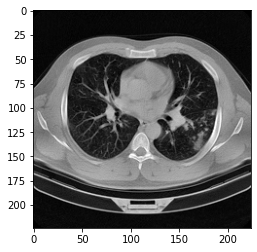

In [17]:
plt.imshow(data[1])

In [18]:
data = np.array(data)
data.shape

(1900, 224, 224, 3)

In [19]:
from sklearn.model_selection import train_test_split
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(train_generator.classes), test_size=0.25)
#trainY = np.asarray(trainY).astype('float32').reshape((-1,1))
#testY = np.asarray(testY).astype('float32').reshape((-1,1))
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1425, 224, 224, 3)
(475, 224, 224, 3)
(1425,)
(475,)


In [21]:
k.clear_session()
def stem(inputs):
    """ Construct the Stem Convolution Group
        inputs : input vector
    """
    # First Convolutional layer, where pooled feature maps will be reduced by 75%
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    return x
    
def learner(x):
    """ Construct the Learner
        x  : input to the learner
    """
    # First Residual Block Group of 64 filters
    x = residual_group(x, 64, 3)

    # Second Residual Block Group of 128 filters
    x = residual_group(x, 128, 3)

    # Third Residual Block Group of 256 filters
    x = residual_group(x, 256, 5)

    # Fourth Residual Block Group of 512 filters
    x = residual_group(x, 512, 2, False)
    return x

    
def residual_group(x, n_filters, n_blocks, conv=True):
    """ Construct a Residual Group
        x        : input to the group
        n_filters: number of filters
        n_blocks : number of blocks in the group
        conv     : flag to include the convolution block connector
    """
    for _ in range(n_blocks):
        x = residual_block(x, n_filters)

    # Double the size of filters and reduce feature maps by 75% (strides=2, 2) to fit the next Residual Group
    if conv:
        x = conv_block(x, n_filters * 2)
    return x

def residual_block(x, n_filters):
    """ Construct a Residual Block of Convolutions
        x        : input into the block
        n_filters: number of filters
    """
    shortcut = x
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                      activation="relu", kernel_initializer="he_normal")(x)
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",
                      activation="relu", kernel_initializer="he_normal")(x)
    x = Add()([shortcut, x])
    return x

def conv_block(x, n_filters):
    """ Construct Block of Convolutions without Pooling
        x        : input into the block
        n_filters: number of filters
    """
    x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                  activation="relu", kernel_initializer="he_normal")(x)
    x = Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same",
                  activation="relu", kernel_initializer="he_normal")(x)
    return x
    
def classifier(x, n_classes):
    """ Construct the Classifier Group
        x         : input vector
        n_classes : number of output classes
    """
    # Pool at the end of all the convolutional residual blocks
    x = GlobalAveragePooling2D()(x)

    # Final Dense Outputting Layer for the outputs
    outputs = Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)
    return outputs

# The input tensor
inputs = Input(shape=(224, 224, 3))

# The Stem Convolution Group
x = stem(inputs)

# The learner
x = learner(x)
    
# The Classifier for 1000 classes
outputs = classifier(x, 2)

# Instantiate the Model
model = Model(inputs, outputs)

In [22]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_ResNetAdamTest.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

In [25]:
from keras.optimizers import Adam, SGD, RMSprop, Adamax

# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adamax(learning_rate=0.01,decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es,checkpoint])

[INFO] training network...
Epoch 1/50
45/45 [==============================] - 9s 132ms/step - loss: 0.6953 - accuracy: 0.4950 - val_loss: 0.6949 - val_accuracy: 0.4842

Epoch 00001: val_accuracy did not improve from 0.48421
Epoch 2/50
45/45 [==============================] - 5s 107ms/step - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6949 - val_accuracy: 0.4842

Epoch 00002: val_accuracy did not improve from 0.48421
Epoch 3/50
45/45 [==============================] - 5s 107ms/step - loss: 0.6928 - accuracy: 0.5205 - val_loss: 0.6943 - val_accuracy: 0.4842

Epoch 00003: val_accuracy did not improve from 0.48421
Epoch 4/50
45/45 [==============================] - 5s 107ms/step - loss: 0.6927 - accuracy: 0.5186 - val_loss: 0.6947 - val_accuracy: 0.4842

Epoch 00004: val_accuracy did not improve from 0.48421
Epoch 5/50
45/45 [==============================] - 5s 108ms/step - loss: 0.6928 - accuracy: 0.5160 - val_loss: 0.6948 - val_accuracy: 0.4842

Epoch 00005: val_accuracy did not impr

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


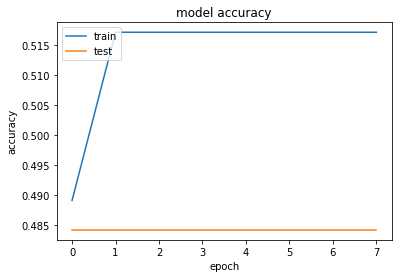

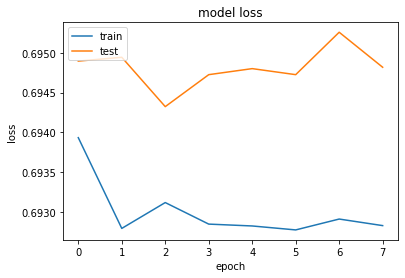

In [26]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = train_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.00      0.00      0.00       245
      normal       0.48      1.00      0.65       230

    accuracy                           0.48       475
   macro avg       0.24      0.50      0.33       475
weighted avg       0.23      0.48      0.32       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[  0 245]
 [  0 230]]


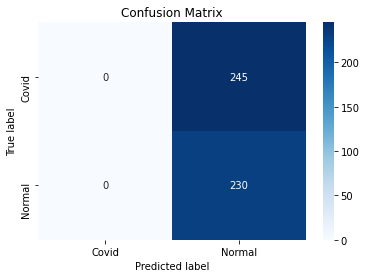

In [29]:
cm = cf_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [31]:
data2 = []
for num,img_name in enumerate(test_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('/content/drive/MyDrive/CLAHEonly/Test/',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data2.append(img)

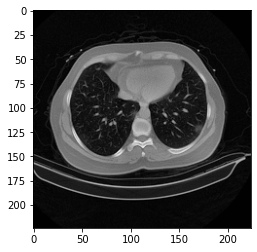

In [32]:
plt.imshow(data2[1])

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY,predictions.argmax(axis=1),target_names = test_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.00      0.00      0.00        93
      normal       0.54      1.00      0.70       107

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.37       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
cf_matrix = confusion_matrix(valY,predictions.argmax(axis=1))
print(cf_matrix)

[[  0  93]
 [  0 107]]


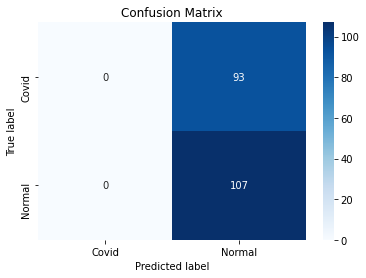

In [36]:
cm = cf_matrix

import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted label');ax.set_ylabel('True label'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Covid','Normal']); 
ax.yaxis.set_ticklabels(['Covid','Normal']);

In [37]:
print("Evaluate on test data")
results = model.evaluate(valX, valY, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
7/7 [==============================] - 0s 38ms/step - loss: 0.6917 - accuracy: 0.5350
test loss, test acc: [0.6916517615318298, 0.5350000262260437]
